In [1]:
import mne
import scipy
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.stats import zscore, pearsonr
%matplotlib widget

### Sanity check: Alpha wave
- Alpha waves are neural oscillations in the frequency range of 8–12 Hz
- Can be predominantly recorded from the occipital lobes during wakeful relaxation with closed eyes


In [2]:
eeglab_set = '../../Experiments/data/YY/Sanity checks/alphawave.set'
eeg_prepro, fs = utils.preprocessing(eeglab_set, HP_cutoff = 0.5, AC_freqs=50, resamp_freqs=None)

Reading c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\..\..\Experiments\data\YY\Sanity checks\alphawave.fdt
Reading 0 ... 124927  =      0.000 ...    61.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 13517 samples (6.600 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13517 samples (6.600 sec)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


Effective window size : 1.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


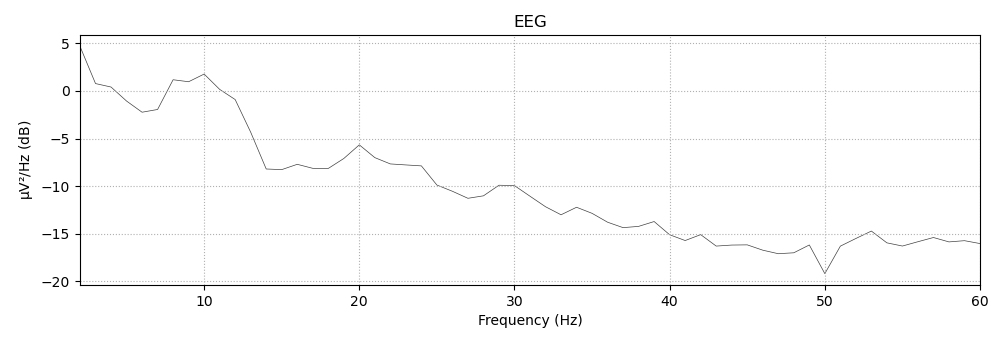

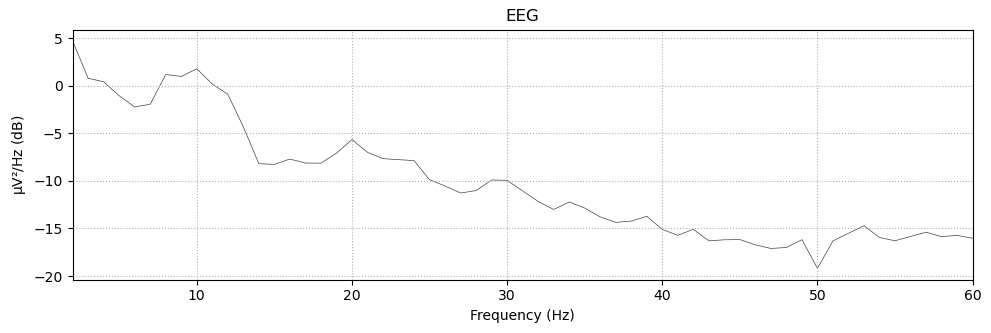

In [3]:
eeg_prepro.compute_psd(fmin=2, fmax=60, method='welch', picks='Oz', n_fft=int(fs)).plot()

### Sanity check: Steady-State Visual Evoked Potentials (SSVEP)
- When the retina is excited by a visual stimulus ranging from 3.5 Hz to 75 Hz, the brain generates an electrical activity at the same (or multiples of the) frequency of the visual stimulus.
- Particularly detectable in the occipital-parietal region of the skull.

In [4]:
eeglab_set = '../../Experiments/data/YY/Sanity checks/blink15.set'
eeg_prepro, fs = utils.preprocessing(eeglab_set, HP_cutoff = 0.5, AC_freqs=50, resamp_freqs=None)

Reading c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\..\..\Experiments\data\YY\Sanity checks\blink15.fdt
Reading 0 ... 26623  =      0.000 ...    13.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 13517 samples (6.600 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Effective window size : 1.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


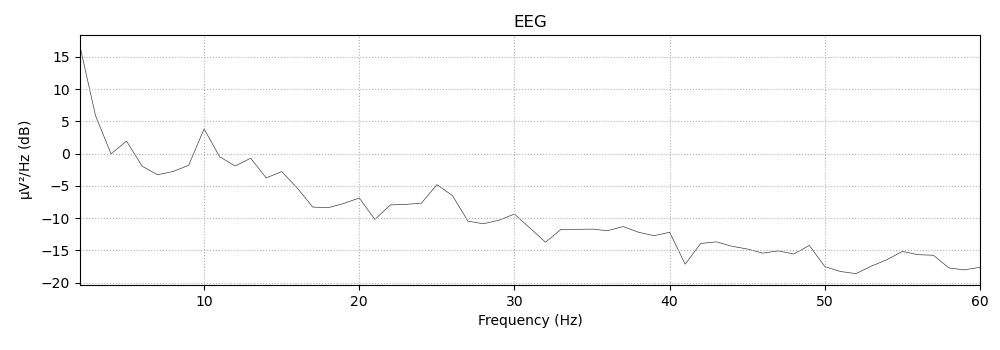

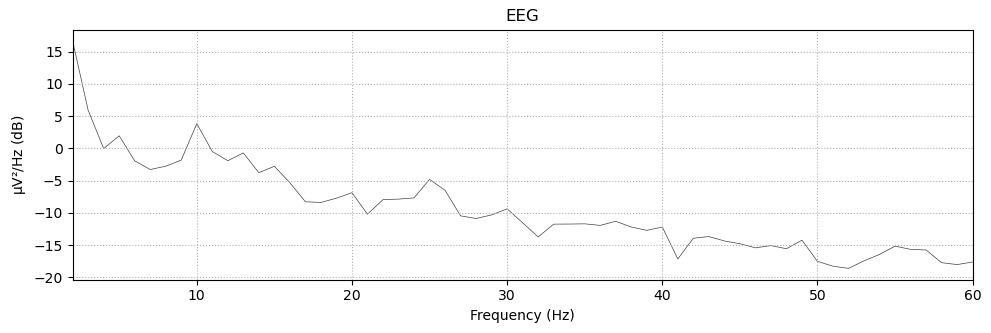

In [5]:
eeg_prepro.compute_psd(fmin=2, fmax=60, method='welch', picks='POz', n_fft=int(fs)).plot()